Using numpy, find linear regression model for house's price prediction problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# 2
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv").values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

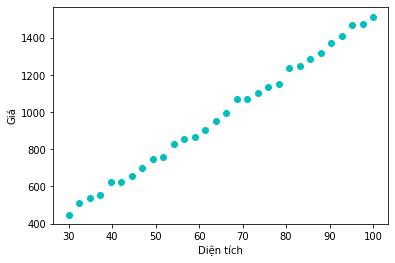

In [ ]:
plt.plot(x, y, 'co')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

In [ ]:
one = np.ones((x.shape[0], 1))
X = np.concatenate((one, x), axis=1)
A = np.dot(X.T, X)
b = np.dot(X.T, y)
w = np.dot(np.linalg.inv(A), b)

In [ ]:
print('w = ', w)

w =  [[-7.06426865]
 [15.2110908 ]]


In [ ]:
w_1 = w[1]
w_0 = w[0]
x0 = np.linspace(30, 105, 30)
y0 = w_0 + w_1*x0

##**Prediction Model and Data**

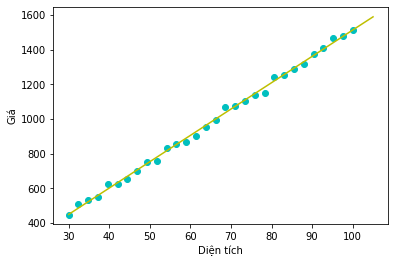

In [ ]:
plt.plot(x, y, 'co')
plt.plot(x0, y0, 'y')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

# **Predict prices of houses with areas of 50, 100 and 150**

In [ ]:
print("Predict price of house with an area of 50:", w_0 + w_1*50)
print("Predict price of house with an area of 50:", w_0 + w_1*100)
print("Predict price of house with an area of 50:", w_0 + w_1*150)

Predict price of house with an area of 50: [753.49027134]
Predict price of house with an area of 50: [1514.04481132]
Predict price of house with an area of 50: [2274.59935131]


In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.shape

(506, 14)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


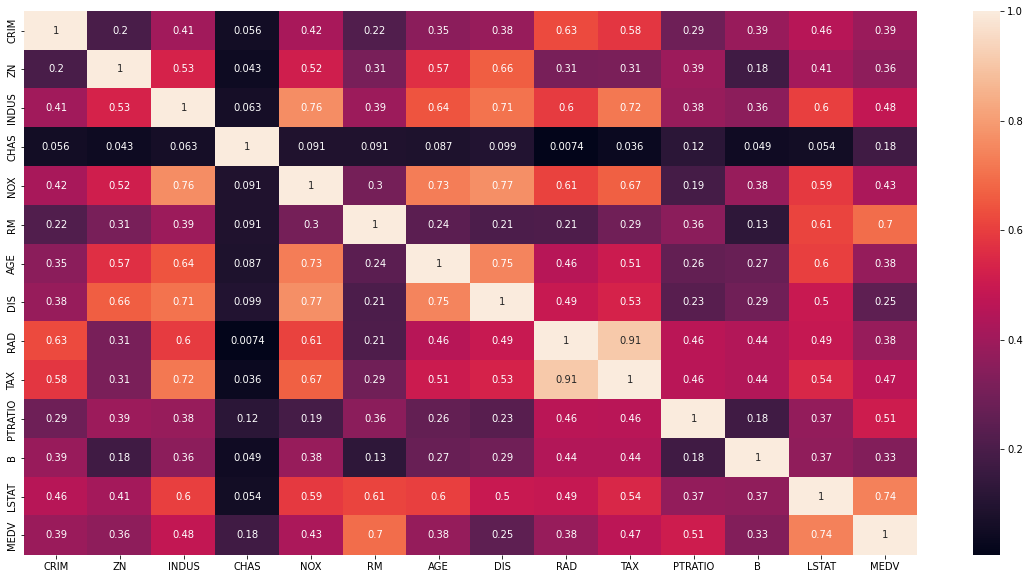

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRATIO has high correlation score with MEDV which is a good indication of using as predictors.

In [ ]:
cols = ['LSTAT', 'INDUS', 'RM', 'TAX', 'NOX', 'PTRATIO']
x = data.loc[:, cols]
y = data['MEDV']

In [ ]:
one = np.ones((x.shape[0], 1))
X = np.concatenate((one, x), axis=1)
A = np.dot(X.T, X)
b = np.dot(X.T, y)
w = np.dot(np.linalg.inv(A), b)
w

array([ 1.91458185e+01, -5.45934588e-01,  8.71873392e-02,  4.65592779e+00,
       -2.90110504e-03, -3.40311735e+00, -9.13819473e-01])

In [ ]:
predict = np.dot(X, w)
R_squared = np.sum((predict - y.mean())**2) / np.sum((y - y.mean())**2)
R_squared

0.6810217497396247